Extracting youtube video and its audio  
using pytube package of python.

In [ ]:
! pip install pytube
! pip install moviepy

## Task 1.1 
getting audio from video

In [51]:
from pytube import YouTube
from moviepy.editor import VideoFileClip


getting stream value of video from youtube using pytube

In [13]:
# url = 'https://www.youtube.com/watch?v=Sby1uJ_NFIY'
url = 'https://www.youtube.com/watch?v=CeSAjK2CBEA&t=81s'

yt_vid = YouTube(url) 

# progressive streams have video and audio in a single file 
# but are only for upto 720p
yt_vid.streams.filter(progressive=True)


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">]

download video from youtube url

In [50]:
def get_video(yt_url):
    try:
        video = YouTube(yt_url)
        video.streams.get_by_itag(22).download(filename='video.mp4')
        print('Video succesfully downloaded from Youtube')
    except Exception as e:
        print(f'Failed to download Youtube video \nerror : {e}')


Extracting audio from downloaded video

In [48]:
def audio_from_video(video_path):
    try:
        video = VideoFileClip(video_path)
        audio = video.audio
        audio.write_audiofile('audio.wav')   
        video.close()
        audio.close()
    except Exception as e:
        print(f'Failed to extract audio from video \nerror : {e}')


In [52]:
url = 'https://www.youtube.com/watch?v=CeSAjK2CBEA&t=81s'
video_path = './video.mp4'

get_video(url)
audio_from_video(video_path)


Video succesfully downloaded from Youtube
MoviePy - Writing audio in audio.wav


MoviePy - Done.


## Task 1.2 
Transcription of audio

audio processing

In [53]:
import wave

In [87]:
obj = wave.open('./audio.wav')

In [84]:
print("number of channels : ", obj.getnchannels())
print("sample width : ", obj.getsampwidth())
print("frame rate : ", obj.getframerate())
print("Number of frames : ", obj.getnframes())
print("parameters", obj.getparams())

obj.close()

number of channels :  2
sample width :  2
frame rate :  44100
Number of frames :  7769979
parameters _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=7769979, comptype='NONE', compname='not compressed')


In [88]:
t_audio = obj.getnframes() / obj.getframerate()
t_audio # seconds

176.19

In [89]:
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))

<class 'bytes'> <class 'int'>
31079916


plotting the wave

In [64]:
import matplotlib.pyplot as plt 
import numpy as np

In [91]:

samp_freq =  obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / samp_freq
type(signal_wave)
signal_wave


b''

ValueError: x and y must have same first dimension, but have shapes (7769979,) and (0,)

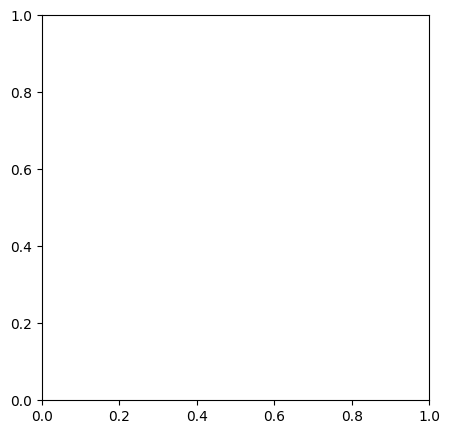

In [92]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
times = np.linspace(0, t_audio, num=n_samples)

plt.figure(figsize=(5,5))
plt.plot(times, signal_array)
plt.title('audio signal')
plt.ylabel('signal wave')
plt.xlabel('time(sec)')
plt.xlim(0, t_audio)
plt.show()